In [ ]:
pip install --upgrade openai transformers datasets==2.10.0 evaluate

In [ ]:
from datasets import load_dataset
import openai
import os
import pandas as pd
import evaluate

In [ ]:
openai.api_key = 'YOUR-API-KEY'
dataset = load_dataset("s-nlp/paradetox") # parallel gold examples

In [ ]:
def few_shot(df, given_text):
  completion = client.chat.completions.create(
    model="gpt-4o-mini",
    seed=42,
    temperature=0.5,
    max_tokens=250,
    messages=[
      {"role": "system", "content": "You are rewriting given toxic tweets to be more neutral in style, while preserving the content."},
      {"role": "user", "content": f"Toxic: '{str(dataset['train'][0]['en_toxic_comment'])}'"},
      {"role": "assistant", "content": f"Neutral: '{str(dataset['train'][0]['en_neutral_comment'])}'"}
      {"role": "user", "content": f"Toxic: '{str(dataset['train'][1]['en_toxic_comment'])}'"},
      {"role": "assistant", "content": f"Neutral: '{str(dataset['train'][1]['en_neutral_comment'])}'"}
      {"role": "user", "content": f"Toxic: '{str(dataset['train'][2]['en_toxic_comment'])}'"},
      {"role": "assistant", "content": f"Neutral: '{str(dataset['train'][2]['en_neutral_comment'])}'"}
      {"role": "user", "content": f"Toxic: '{str(dataset['train'][3]['en_toxic_comment'])}'"},
      {"role": "assistant", "content": f"Neutral: '{str(dataset['train'][3]['en_neutral_comment'])}'"}
      {"role": "user", "content": f"Toxic: '{str(dataset['train'][4]['en_toxic_comment'])}'"},
      {"role": "assistant", "content": f"Neutral: '{str(dataset['train'][4]['en_neutral_comment'])}'"}
      {"role": "user", "content": f"Toxic: '{str(dataset['train'][5]['en_toxic_comment'])}'"},
      {"role": "assistant", "content": f"Neutral: '{str(dataset['train'][5]['en_neutral_comment'])}'"},
      {"role": "user", "content": f"Toxic: '{given_text}'"}
    ]
  )
  return completion.choices[0].message.content

In [ ]:
fewShot(dataset, "i'm gonna ban everyone talks shit about me, cuz i do whatever i want")

"\nI'm going to protect myself from insulting comments and I will live my life on my own terms."

Evaluation with BLEURT score

In [ ]:
references =[]
predictions =[]
for i in range(5000,5100):
  references.append(str(dataset['train'][i]['en_neutral_comment']))
  predictions.append(fewShot(str(dataset['train'][i]['en_toxic_comment'])))
refPred = pd.DataFrame(predictions, columns=["predictions"])
refPred['references'] = references
refPred.to_csv('toBeEval.csv') # save for future evaluations

In [ ]:
pip install git+https://github.com/google-research/bleurt.git

In [ ]:
bleurt = evaluate.load("bleurt", "BLEURT-20")

Computing checksums: 100%|##########| 1/1 [00:26<00:00, 26.90s/it]

In [ ]:
res = bleurt.compute(predictions=predictions,references =labels[:-1])

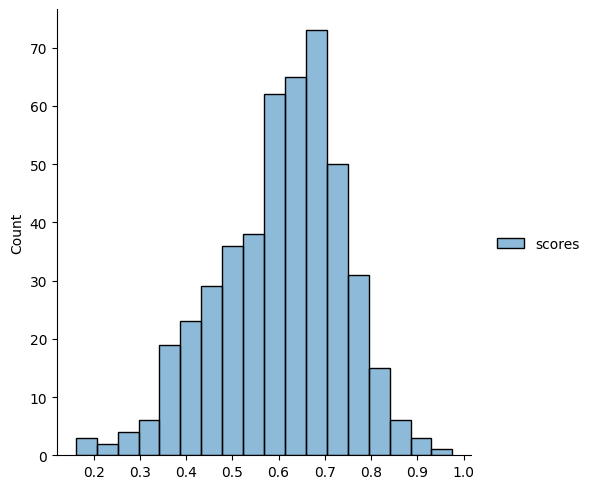

In [ ]:
import seaborn as sns

sns.displot(res)